In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./student-mat.csv', delimiter=';')
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [3]:
df['average_grade'] = df[['G1', 'G2', 'G3']].mean(axis=1)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,average_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,8.666667


In [4]:
print(df[["studytime", "average_grade"]].describe())

        studytime  average_grade
count  395.000000     395.000000
mean     2.035443      10.679325
std      0.839240       3.696786
min      1.000000       1.333333
25%      1.000000       8.333333
50%      2.000000      10.666667
75%      2.000000      13.333333
max      4.000000      19.333333


In [5]:
df['studytime'].unique()

array([2, 3, 1, 4])

## Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Map studytime according to the description provided in the dataset
studytime_map = {
    1: 1,     # <2 hours
    2: 3.5,   # 2 to 5 hours
    3: 7.5,   # 5 to 10 hours
    4: 12     # >10 hours
}
df['studytime_hours'] = df['studytime'].map(studytime_map)

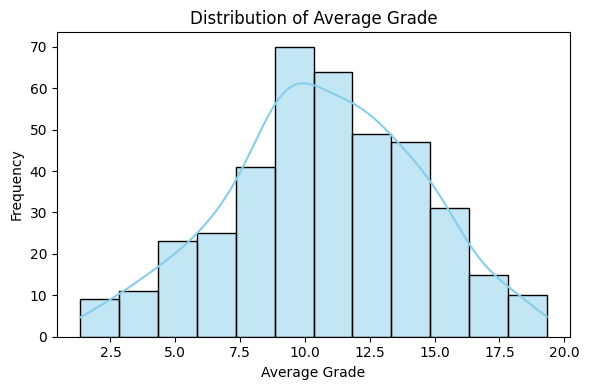

In [13]:
# Histogram for Average Grade
plt.figure(figsize=(6, 4))
sns.histplot(df['average_grade'], bins=12, kde=True, color='skyblue')
plt.title("Distribution of Average Grade")
plt.xlabel("Average Grade")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

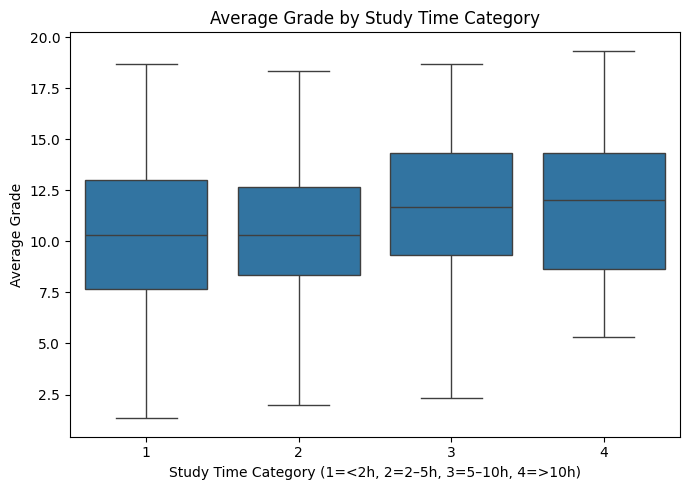

In [8]:
# Boxplot: Study Time (ordinal) vs Average Grade
plt.figure(figsize=(7, 5))
sns.boxplot(x='studytime', y='average_grade', data=df)
plt.title("Average Grade by Study Time Category")
plt.xlabel("Study Time Category (1=<2h, 2=2–5h, 3=5–10h, 4=>10h)")
plt.ylabel("Average Grade")
plt.tight_layout()
plt.show()


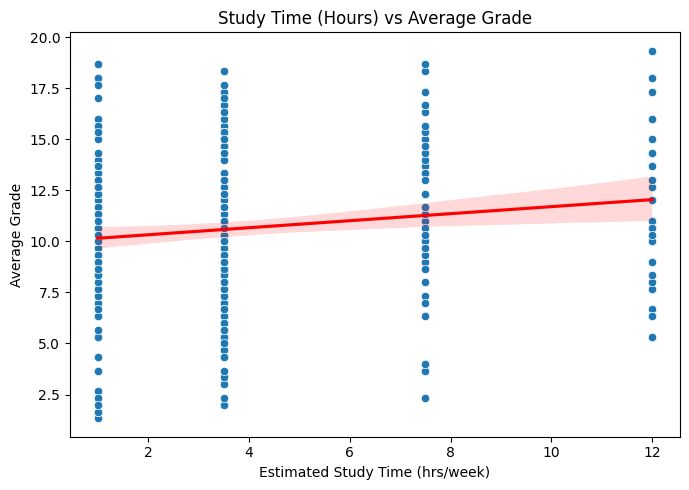

In [9]:
# Scatter plot using study time
plt.figure(figsize=(7, 5))
sns.scatterplot(x='studytime_hours', y='average_grade', data=df)
sns.regplot(x='studytime_hours', y='average_grade', data=df, scatter=False, color='red')
plt.title("Study Time (Hours) vs Average Grade")
plt.xlabel("Estimated Study Time (hrs/week)")
plt.ylabel("Average Grade")
plt.tight_layout()
plt.show()

### Pearson Test

In [10]:
from scipy.stats import pearsonr

# Compute Pearson correlation
corr_coef, p_value_two_tailed = pearsonr(df['studytime_hours'], df['average_grade'])

# Convert to one-tailed p-value
if corr_coef > 0:
    p_value_one_tailed = p_value_two_tailed / 2
else:
    p_value_one_tailed = 1 - (p_value_two_tailed / 2)

# Set significance level
alpha = 0.05

# Print results
print(f"Pearson Correlation Coefficient: {corr_coef:.4f}")
print(f"One-tailed p-value: {p_value_one_tailed:.4f}")
print(f"Significance Level (alpha): {alpha}")

# Decision
if p_value_one_tailed < alpha:
    print("Result: p-value < alpha → Reject the null hypothesis.")
    print("Conclusion: There is a statistically significant positive relationship between study time and average grade.")
else:
    print("Result: p-value >= alpha → Fail to reject the null hypothesis.")
    print("Conclusion: There is not enough evidence to support a significant relationship between study time and average grade.")


Pearson Correlation Coefficient: 0.1391
One-tailed p-value: 0.0028
Significance Level (alpha): 0.05
Result: p-value < alpha → Reject the null hypothesis.
Conclusion: There is a statistically significant positive relationship between study time and average grade.


## Linear regression test

In [ ]:
import statsmodels.api as sm

# Define independent (X) and dependent (y) variables
X = df['studytime_hours']
y = df['average_grade']

# Add constant term
X = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y, X).fit()

# Display summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          average_grade   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     7.750
Date:                Mon, 05 May 2025   Prob (F-statistic):            0.00563
Time:                        17:40:34   Log-Likelihood:                -1072.6
No. Observations:                 395   AIC:                             2149.
Df Residuals:                     393   BIC:                             2157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               9.9782      0.312     

In [12]:
# Extract coefficient and p-value for studytime_hours
coef = model.params['studytime_hours']
p_value_two_tailed = model.pvalues['studytime_hours']

# Convert to one-tailed p-value
if coef > 0:
    p_value_one_tailed = p_value_two_tailed / 2
else:
    p_value_one_tailed = 1 - (p_value_two_tailed / 2)

# Set significance level
alpha = 0.05

# Print results
print(f"Regression Coefficient for Study Time: {coef:.4f}")
print(f"One-tailed p-value: {p_value_one_tailed:.4f}")
print(f"Significance Level (alpha): {alpha}")

# Hypothesis decision
if p_value_one_tailed < alpha:
    print("Result: p-value < alpha → Reject the null hypothesis.")
    print("Conclusion: Study time has a statistically significant positive effect on average grade.")
else:
    print("Result: p-value >= alpha → Fail to reject the null hypothesis.")
    print("Conclusion: No statistically significant relationship found between study time and grade.")


Regression Coefficient for Study Time: 0.1721
One-tailed p-value: 0.0028
Significance Level (alpha): 0.05
Result: p-value < alpha → Reject the null hypothesis.
Conclusion: Study time has a statistically significant positive effect on average grade.


# Hardware/Software used for analysis

#### Processor: 13th Gen Intel® Core™ i9-13900K @ 3.00 GHz
#### RAM: 64.0 GB
#### System Type: 64-bit operating system, x64-based processor
#### Operating System: Windows 11 Education, Version 24H2, Build 26100.3775
